In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data Set

In [2]:
dataset = pd.read_csv('rgr_data_test.csv')
dataset.head()

,RIDER_ID,LOCATION,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,ACQUISITION_CHANNEL,VEHICLE_TYPE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
0,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,7,11.9,12,1.01,NaN,NaN
1,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,14,13.1,13,0.99,NaN,NaN
2,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,28,19.1,20,1.04,NaN,NaN
3,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,56,33.4,39,1.17,NaN,NaN
4,73350,Roo de Janeiro,2016-10-29 00:00:00.000000000,2016-11-07 00:00:00.000000000,2016-11-09,Organic,Bicycle,84,33.4,39,1.17,NaN,NaN


In [3]:
dataset.dtypes

RIDER_ID                             int64
LOCATION                            object
APPLICATION_DATE                    object
APPLICATION_APPROVED_DATE           object
FIRST_WORK_DATE                     object
ACQUISITION_CHANNEL                 object
VEHICLE_TYPE                        object
DAYS_SINCE_ACQUISITION               int64
HOURS_WORKED_CUMULATIVE            float64
ORDERS_DELIVERED_CUMULATIVE          int64
THROUGHPUT_CUMULATIVE              float64
REFERRALS_CUMULATIVE               float64
SUCCESSFUL_REFERRALS_CUMULATIVE    float64
dtype: object

In [4]:
dataset.describe()

,RIDER_ID,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
count,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,4056.000000,4056.000000
mean,80934.348347,59.500000,88.131536,180.793608,1.874058,2.025148,0.376726
std,12777.801095,55.081888,144.440770,329.754352,0.704813,5.167179,0.778940
min,1864.000000,7.000000,0.200000,0.000000,0.000000,1.000000,0.000000
25%,70990.000000,14.000000,15.700000,26.000000,1.460000,1.000000,0.000000
50%,77741.000000,42.000000,37.100000,67.000000,1.940000,1.000000,0.000000
75%,94220.000000,84.000000,94.300000,180.000000,2.350000,2.000000,1.000000
max,103776.000000,168.000000,2042.400000,4856.000000,6.150000,286.000000,27.000000


## Data Cleaning

### Data Transformation

Transform date columns

In [5]:
# Change the date columns to datetime
dataset['APPLICATION_DATE'] = pd.to_datetime(dataset['APPLICATION_DATE'])#.dt.date
dataset['APPLICATION_APPROVED_DATE']= pd.to_datetime(dataset['APPLICATION_APPROVED_DATE'])#.dt.date
dataset['FIRST_WORK_DATE']= pd.to_datetime(dataset['FIRST_WORK_DATE'])#.dt.date
dataset['FIRST_WORK_MONTH'] = pd.to_datetime(dataset['FIRST_WORK_DATE']).dt.strftime('%Y-%m')

dataset['REFERRALS_CUMULATIVE'].fillna(0, inplace=True)
dataset['SUCCESSFUL_REFERRALS_CUMULATIVE'].fillna(0, inplace=True)


dataset.describe()

,RIDER_ID,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
count,31038.000000,30024,30078,31038,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000
mean,80934.348347,2016-09-23 00:30:47.482014464,2016-12-15 21:14:49.766606848,2016-12-19 20:56:50.013531648,59.500000,88.131536,180.793608,1.874058,0.264643,0.049230
min,1864.000000,2015-01-20 00:00:00,2015-08-07 00:00:00,2016-10-13 00:00:00,7.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,70990.000000,2016-09-04 00:00:00,2016-11-01 00:00:00,2016-11-05 00:00:00,14.000000,15.700000,26.000000,1.460000,0.000000,0.000000
50%,77741.000000,2016-10-22 00:00:00,2016-11-26 00:00:00,2016-11-30 00:00:00,42.000000,37.100000,67.000000,1.940000,0.000000,0.000000
75%,94220.000000,2016-11-29 00:00:00,2017-02-13 00:00:00,2017-02-16 00:00:00,84.000000,94.300000,180.000000,2.350000,0.000000,0.000000
max,103776.000000,2017-03-31 00:00:00,2017-09-17 00:00:00,2017-04-08 00:00:00,168.000000,2042.400000,4856.000000,6.150000,286.000000,27.000000
std,12777.801095,NaN,NaN,NaN,55.081888,144.440770,329.754352,0.704813,1.988531,0.308861


## Missing Values

Check for missing values in each column and gauge their effect on your analysis

In [6]:
# Check for missing values
print(dataset.isnull().sum())

RIDER_ID                              0
LOCATION                              0
APPLICATION_DATE                   1014
APPLICATION_APPROVED_DATE           960
FIRST_WORK_DATE                       0
ACQUISITION_CHANNEL                   0
VEHICLE_TYPE                          0
DAYS_SINCE_ACQUISITION                0
HOURS_WORKED_CUMULATIVE               0
ORDERS_DELIVERED_CUMULATIVE           0
THROUGHPUT_CUMULATIVE                 0
REFERRALS_CUMULATIVE                  0
SUCCESSFUL_REFERRALS_CUMULATIVE       0
FIRST_WORK_MONTH                      0
dtype: int64


### Missing values analysis of APPLICATION_DATE column

In [7]:
# filter rows with APPLICATION_DATE missing
df_missing_application_date = dataset[dataset['APPLICATION_DATE'].isnull()]
print(f"Missing values in APPLICATION_APPROVED_DATE when APPLICATION_DATE is missing :\
 {df_missing_application_date['APPLICATION_APPROVED_DATE'].isnull().sum()}")

print("Missing values in APPLICATION_DATE column encompasses missing values in APPLICATION_APPROVED_DATE column")

Missing values in APPLICATION_APPROVED_DATE when APPLICATION_DATE is missing : 960
Missing values in APPLICATION_DATE column encompasses missing values in APPLICATION_APPROVED_DATE column


In [8]:
# find the count of cities with missing APPLICATION_DATE
print(f"Count of cities with missing APPLICATION_DATE : {df_missing_application_date['LOCATION'].value_counts()}")
# count of ACQUISITION_CHANNEL with missing APPLICATION_DATE
print(f"Count of ACQUISITION_CHANNEL with missing APPLICATION_DATE : {df_missing_application_date['ACQUISITION_CHANNEL'].value_counts()}")

Count of cities with missing APPLICATION_DATE : LOCATION
Roo de Janeiro    480
Roo York          390
Roo Town          144
Name: count, dtype: int64
Count of ACQUISITION_CHANNEL with missing APPLICATION_DATE : ACQUISITION_CHANNEL
Unknown     648
Organic     264
Digital      48
Referral     42
Offline      12
Name: count, dtype: int64


In [9]:
df_missing_application_date.describe()

,RIDER_ID,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE
count,1014.000000,0,54,1014,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,79698.840237,NaT,2017-07-23 10:40:00,2016-12-19 17:02:29.112425984,59.500000,104.794477,208.281065,1.941844,0.238659,0.021696
min,21106.000000,NaT,2017-04-29 00:00:00,2016-10-13 00:00:00,7.000000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,71218.000000,NaT,2017-07-18 00:00:00,2016-11-09 00:00:00,14.000000,17.000000,29.000000,1.560000,0.000000,0.000000
50%,77890.000000,NaT,2017-08-16 00:00:00,2016-12-04 00:00:00,42.000000,39.950000,75.000000,1.905000,0.000000,0.000000
75%,92879.000000,NaT,2017-09-02 00:00:00,2017-02-05 00:00:00,84.000000,104.650000,193.000000,2.360000,0.000000,0.000000
max,103758.000000,NaT,2017-09-04 00:00:00,2017-04-08 00:00:00,168.000000,1474.600000,4117.000000,3.620000,10.000000,2.000000
std,14676.227382,NaN,NaN,NaN,55.108181,181.142988,392.186604,0.694906,0.834974,0.164832


<Axes: title={'center': 'THROUGHPUT_CUMULATIVE'}, ylabel='Frequency'>

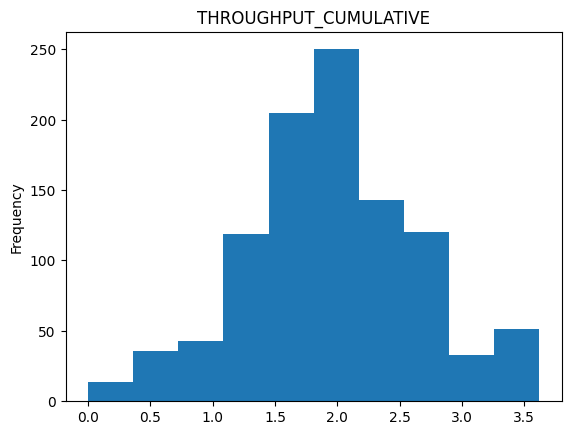

In [10]:
df_missing_application_date['THROUGHPUT_CUMULATIVE'].plot.hist(title='THROUGHPUT_CUMULATIVE')

<Axes: title={'center': 'REFERRALS_CUMULATIVE'}, ylabel='Frequency'>

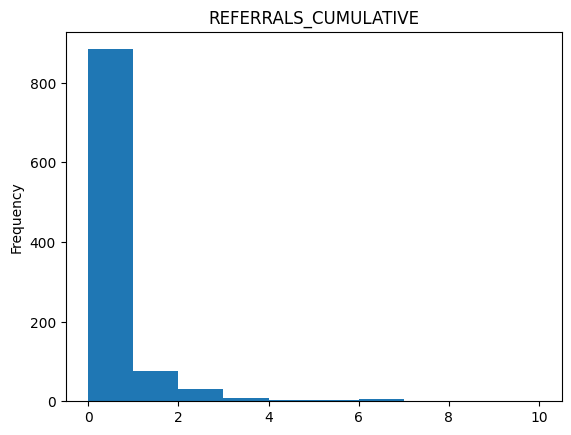

In [11]:
df_missing_application_date['REFERRALS_CUMULATIVE'].plot.hist(title='REFERRALS_CUMULATIVE')


<Axes: title={'center': 'SUCCESSFUL_REFERRALS_CUMULATIVE'}, ylabel='Frequency'>

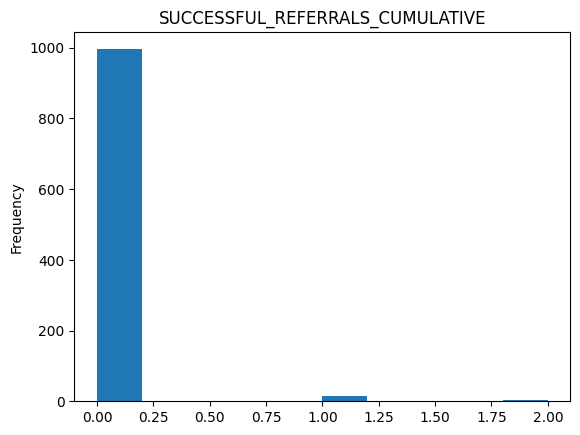

In [12]:
df_missing_application_date['SUCCESSFUL_REFERRALS_CUMULATIVE'].plot.hist(title='SUCCESSFUL_REFERRALS_CUMULATIVE')


In [13]:
dataset['APPLICATION_DATE'].dt.year.value_counts() #.describe()

dataset['FIRST_WORK_DATE'].describe()

count                            31038
mean     2016-12-19 20:56:50.013531648
min                2016-10-13 00:00:00
25%                2016-11-05 00:00:00
50%                2016-11-30 00:00:00
75%                2017-02-16 00:00:00
max                2017-04-08 00:00:00
Name: FIRST_WORK_DATE, dtype: object

## Feature generation

In [14]:
# first application is approved on Aug 2015 but the first work date is on Oct 2016 why? Is this an outlier ?
# Calculate time difference between application date and application approved date
dataset['time_diff_app_approval'] = (dataset['APPLICATION_APPROVED_DATE'] - dataset['APPLICATION_DATE']).dt.days
# calculate time difference between application approved date and first work date
dataset['time_diff_approval_first_work'] = (dataset['FIRST_WORK_DATE'] - dataset['APPLICATION_APPROVED_DATE']).dt.days

dataset.describe()

,RIDER_ID,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,time_diff_app_approval,time_diff_approval_first_work
count,31038.000000,30024,30078,31038,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,31038.000000,30024.000000,30078.000000
mean,80934.348347,2016-09-23 00:30:47.482014464,2016-12-15 21:14:49.766606848,2016-12-19 20:56:50.013531648,59.500000,88.131536,180.793608,1.874058,0.264643,0.049230,83.469025,3.967884
min,1864.000000,2015-01-20 00:00:00,2015-08-07 00:00:00,2016-10-13 00:00:00,7.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-330.000000
25%,70990.000000,2016-09-04 00:00:00,2016-11-01 00:00:00,2016-11-05 00:00:00,14.000000,15.700000,26.000000,1.460000,0.000000,0.000000,9.000000,1.000000
50%,77741.000000,2016-10-22 00:00:00,2016-11-26 00:00:00,2016-11-30 00:00:00,42.000000,37.100000,67.000000,1.940000,0.000000,0.000000,25.000000,2.000000
75%,94220.000000,2016-11-29 00:00:00,2017-02-13 00:00:00,2017-02-16 00:00:00,84.000000,94.300000,180.000000,2.350000,0.000000,0.000000,91.000000,5.000000
max,103776.000000,2017-03-31 00:00:00,2017-09-17 00:00:00,2017-04-08 00:00:00,168.000000,2042.400000,4856.000000,6.150000,286.000000,27.000000,929.000000,603.000000
std,12777.801095,NaN,NaN,NaN,55.081888,144.440770,329.754352,0.704813,1.988531,0.308861,131.816363,27.462851


In [15]:
# extract necessary columns for analysis

# dataset['ORDERS_DELIVERED_CUMULATIVE'].median(), dataset['ORDERS_DELIVERED_CUMULATIVE'].mean(), dataset['ORDERS_DELIVERED_CUMULATIVE'].max()

# dataset[dataset['ORDERS_DELIVERED_CUMULATIVE']==dataset['ORDERS_DELIVERED_CUMULATIVE'].max()],168*24
dataset[dataset['DAYS_SINCE_ACQUISITION'] == 168].describe()#.shape, dataset.shape

,RIDER_ID,APPLICATION_DATE,APPLICATION_APPROVED_DATE,FIRST_WORK_DATE,DAYS_SINCE_ACQUISITION,HOURS_WORKED_CUMULATIVE,ORDERS_DELIVERED_CUMULATIVE,THROUGHPUT_CUMULATIVE,REFERRALS_CUMULATIVE,SUCCESSFUL_REFERRALS_CUMULATIVE,time_diff_app_approval,time_diff_approval_first_work
count,5173.000000,5004,5013,5173,5173.0,5173.000000,5173.000000,5173.000000,5173.000000,5173.000000,5004.000000,5013.000000
mean,80934.348347,2016-09-23 00:30:47.482014464,2016-12-15 21:14:49.766606848,2016-12-19 20:56:50.013531648,168.0,203.548328,441.034023,1.955482,0.649720,0.140344,83.469025,3.967884
min,1864.000000,2015-01-20 00:00:00,2015-08-07 00:00:00,2016-10-13 00:00:00,168.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-330.000000
25%,70990.000000,2016-09-04 00:00:00,2016-11-01 00:00:00,2016-11-05 00:00:00,168.0,30.600000,51.000000,1.530000,0.000000,0.000000,9.000000,1.000000
50%,77741.000000,2016-10-22 00:00:00,2016-11-26 00:00:00,2016-11-30 00:00:00,168.0,94.100000,175.000000,2.040000,0.000000,0.000000,25.000000,2.000000
75%,94220.000000,2016-11-29 00:00:00,2017-02-13 00:00:00,2017-02-16 00:00:00,168.0,272.200000,578.000000,2.450000,0.000000,0.000000,91.000000,5.000000
max,103776.000000,2017-03-31 00:00:00,2017-09-17 00:00:00,2017-04-08 00:00:00,168.0,2042.400000,4856.000000,5.070000,286.000000,27.000000,929.000000,603.000000
std,12778.830459,NaN,NaN,NaN,0.0,262.726882,616.608908,0.702890,4.400294,0.609938,131.827341,27.465134


### Question 1:

How has RGR performed? How does that compare with other channels?

<Axes: title={'center': 'PROPORTION OF RIDERS PER ACQUISITION_CHANNEL'}>

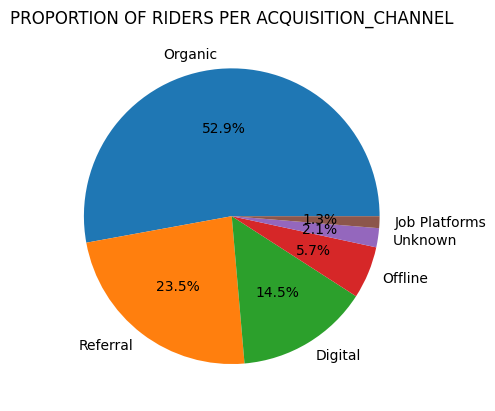

In [16]:
# ACQUISITION_CHANNEL is a categorical variable that contains the information about rider's awareness of job

# generate a pie chart of the ACQUISITION_CHANNEL
dataset.ACQUISITION_CHANNEL.value_counts().plot.pie(autopct='%1.1f%%', ylabel="", title='PROPORTION OF RIDERS PER ACQUISITION_CHANNEL')

### Location wise RGR performance

<Axes: title={'center': 'NUMBER OF RIDERS PER LOCATION'}>

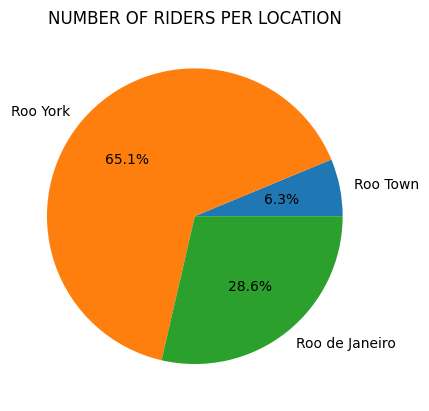

In [17]:
# group riders by location
dataset.groupby('LOCATION').size().plot.pie(autopct='%1.1f%%',title='NUMBER OF RIDERS PER LOCATION') #bar(title='NUMBER OF RIDERS PER LOCATION')

<Axes: title={'center': 'ROO TOWN'}>

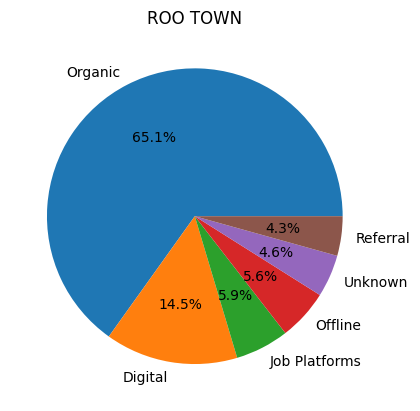

In [18]:
# group acquisition channel by location
dataset.groupby('LOCATION')['ACQUISITION_CHANNEL'].value_counts(normalize=True)['Roo Town']\
        .plot.pie(autopct='%1.1f%%',ylabel="",title='ROO TOWN') #.plot(kind='bar', title='ACQUISITION_CHANNEL BY LOCATION')

<Axes: title={'center': 'ROO YORK'}>

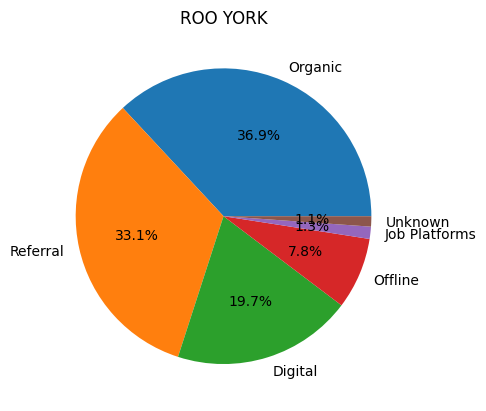

In [19]:
dataset.groupby('LOCATION')['ACQUISITION_CHANNEL'].value_counts(normalize=True)['Roo York']\
        .plot.pie(autopct='%1.1f%%',ylabel="",title='ROO YORK')


<Axes: title={'center': 'ROO DE JANEIRO'}>

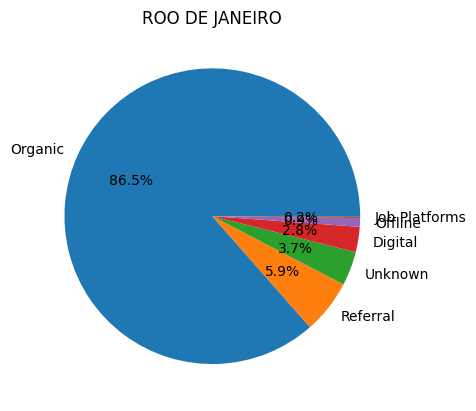

In [20]:
dataset.groupby('LOCATION')['ACQUISITION_CHANNEL'].value_counts(normalize=True)['Roo de Janeiro']\
        .plot.pie(autopct='%1.1f%%',ylabel="",title='ROO DE JANEIRO')


<Axes: title={'center': 'PERCENTAGE OF RIDERS JOINED THROUGH RGR'}, xlabel='LOCATION', ylabel='Percentage (%)'>

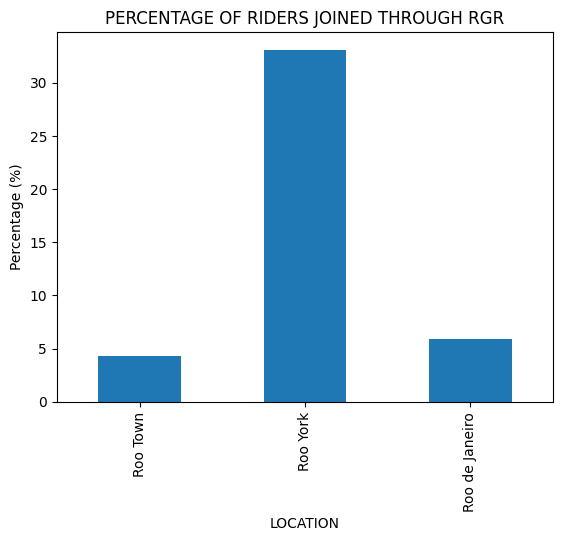

In [21]:
# what percentage of riders are aware of the job through the acquisition channel 'Referral'?
(dataset.groupby('LOCATION')['ACQUISITION_CHANNEL'].value_counts(normalize=True)[:, 'Referral']*100)\
    .plot.bar(title='PERCENTAGE OF RIDERS JOINED THROUGH RGR', ylabel='Percentage (%)')

### Performance of riders 

In [22]:
# groupby rider id
df_riders = dataset.groupby(['RIDER_ID']).agg(LOCATION=('LOCATION', 'first'), 
                                              ACQUISITION_CHANNEL=('ACQUISITION_CHANNEL', 'first'), 
                                              HOURS_WORKED_CUMULATIVE=('HOURS_WORKED_CUMULATIVE', 'last'), 
                                              ORDERS_DELIVERED_CUMULATIVE=('ORDERS_DELIVERED_CUMULATIVE', 'last'), 
                                              THROUGHPUT_CUMULATIVE=('THROUGHPUT_CUMULATIVE', 'last'), 
                                              REFERRALS_CUMULATIVE=('REFERRALS_CUMULATIVE', 'last'), 
                                              SUCCESSFUL_REFERRALS_CUMULATIVE=('SUCCESSFUL_REFERRALS_CUMULATIVE', 'last'),
                                              FIRST_WORK_DATE=('FIRST_WORK_DATE', 'first'),
                                              ).reset_index()

# dataset['HOURS_WORKED_CUMULATIVE'].plot.hist(title='HOURS_WORKED_CUMULATIVE')

# histogram of hours worked between 25th and 75th percentile
# dataset['HOURS_WORKED_CUMULATIVE'].plot.hist(title='HOURS_WORKED_CUMULATIVE', range=(dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.25), dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.75)))
# dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.25), dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.75),dataset['HOURS_WORKED_CUMULATIVE'].max()


# filter rows with HOURS_WORKED_CUMULATIVE between 25th percentile and 75th percentile
print("Number of rows with HOURS_WORKED_CUMULATIVE between 25th and 75th percentile : ", dataset[(dataset['HOURS_WORKED_CUMULATIVE'] >= dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.25)) & (dataset['HOURS_WORKED_CUMULATIVE'] <= dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.75))].shape[0])
# dataset.shape, dataset[(dataset['HOURS_WORKED_CUMULATIVE'] >= dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.25)) & (dataset['HOURS_WORKED_CUMULATIVE'] <= dataset['HOURS_WORKED_CUMULATIVE'].quantile(0.75))].shape

Number of rows with HOURS_WORKED_CUMULATIVE between 25th and 75th percentile :  15540


Location wise rider performance

Hours worked by acquisition channel

<Axes: title={'center': 'HOURS WORKED BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='Percentage of HOURS WORKED'>

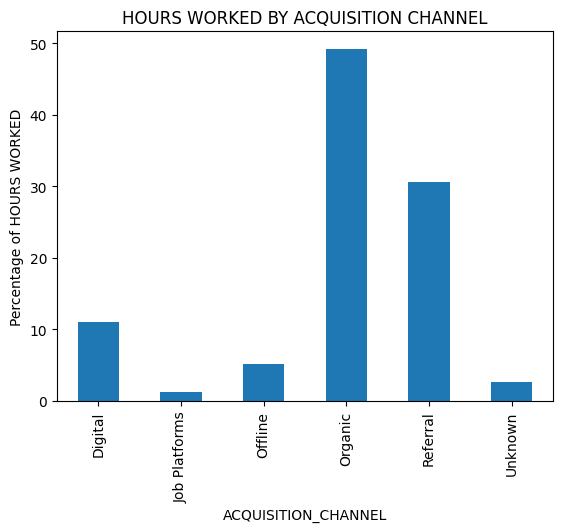

In [23]:
(df_riders.groupby('ACQUISITION_CHANNEL')['HOURS_WORKED_CUMULATIVE'].sum().div(df_riders['HOURS_WORKED_CUMULATIVE'].sum())*100)\
        .plot.bar(title='HOURS WORKED BY ACQUISITION CHANNEL',ylabel='Percentage of HOURS WORKED')

ACQUISITION_CHANNEL
Digital           68.00
Job Platforms     78.60
Offline           76.30
Organic           93.50
Referral         122.00
Unknown           90.25
Name: HOURS_WORKED_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN HOURS WORKED BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='HOURS WORKED'>

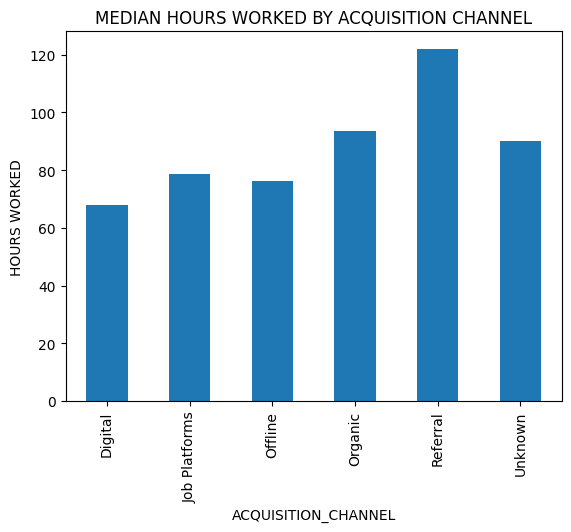

In [29]:
print(df_riders.groupby('ACQUISITION_CHANNEL')['HOURS_WORKED_CUMULATIVE'].median())
df_riders.groupby('ACQUISITION_CHANNEL')['HOURS_WORKED_CUMULATIVE'].median().plot.bar(title='MEDIAN HOURS WORKED BY ACQUISITION CHANNEL',ylabel='HOURS WORKED')

Orders delivered per acquisition channel

<Axes: title={'center': 'ORDERS DELIVERED BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='Percentage of ORDERS DELIVERED'>

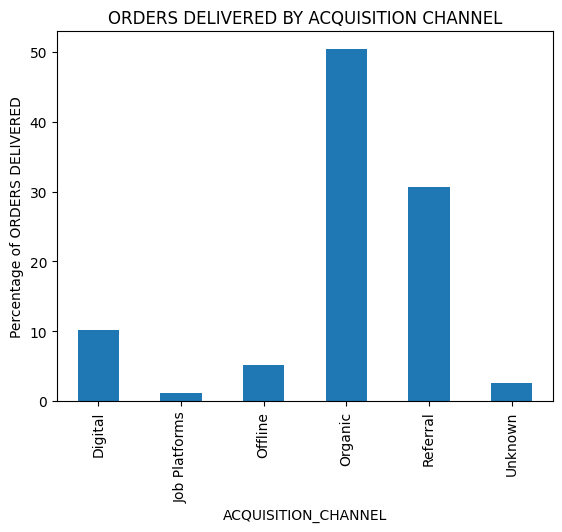

In [26]:
(df_riders.groupby('ACQUISITION_CHANNEL')['ORDERS_DELIVERED_CUMULATIVE'].sum().div(df_riders['ORDERS_DELIVERED_CUMULATIVE'].sum())*100)\
        .plot.bar(title='ORDERS DELIVERED BY ACQUISITION CHANNEL',ylabel='Percentage of ORDERS DELIVERED')

ACQUISITION_CHANNEL
Digital          114.0
Job Platforms    126.0
Offline          142.0
Organic          182.0
Referral         222.5
Unknown          177.0
Name: ORDERS_DELIVERED_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN ORDERS DELIVERED BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='ORDERS DELIVERED'>

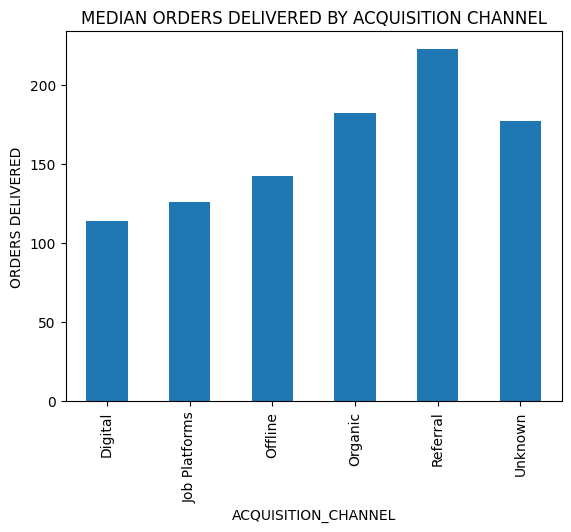

In [28]:
print(df_riders.groupby('ACQUISITION_CHANNEL')['ORDERS_DELIVERED_CUMULATIVE'].median())
df_riders.groupby('ACQUISITION_CHANNEL')['ORDERS_DELIVERED_CUMULATIVE'].median().plot.bar(title='MEDIAN ORDERS DELIVERED BY ACQUISITION CHANNEL',ylabel='ORDERS DELIVERED')

Locationwise hours worked and orders delivered per acquisition channel

LOCATION
Roo Town           80922.2
Roo York          672270.7
Roo de Janeiro    299762.6
Name: HOURS_WORKED_CUMULATIVE, dtype: float64


<Axes: title={'center': 'HOURS WORKED BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION', ylabel='Percentage'>

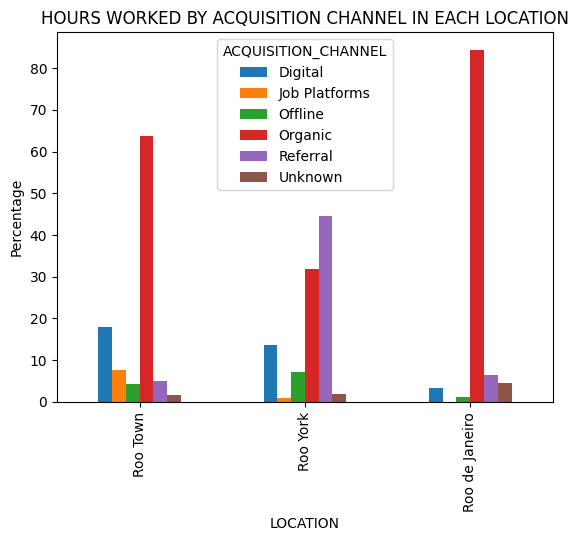

In [166]:
workhours_loc = df_riders.groupby('LOCATION')['HOURS_WORKED_CUMULATIVE'].sum()
print(workhours_loc)

(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['HOURS_WORKED_CUMULATIVE'].sum().unstack(level=1)\
.div(workhours_loc,0)*100).plot.bar(title='HOURS WORKED BY ACQUISITION CHANNEL IN EACH LOCATION', ylabel="Percentage")#plot(kind='bar', stacked=True)

LOCATION        ACQUISITION_CHANNEL
Roo Town        Digital                293.80
                Job Platforms          291.20
                Offline                138.70
                Organic                176.20
                Referral               260.50
                Unknown                 50.80
Roo York        Digital                 56.70
                Job Platforms           55.80
                Offline                 72.15
                Organic                 72.25
                Referral               119.30
                Unknown                131.15
Roo de Janeiro  Digital                 97.90
                Job Platforms           62.50
                Offline                148.35
                Organic                106.95
                Referral               122.40
                Unknown                 95.50
Name: HOURS_WORKED_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN HOURS WORKED BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION'>

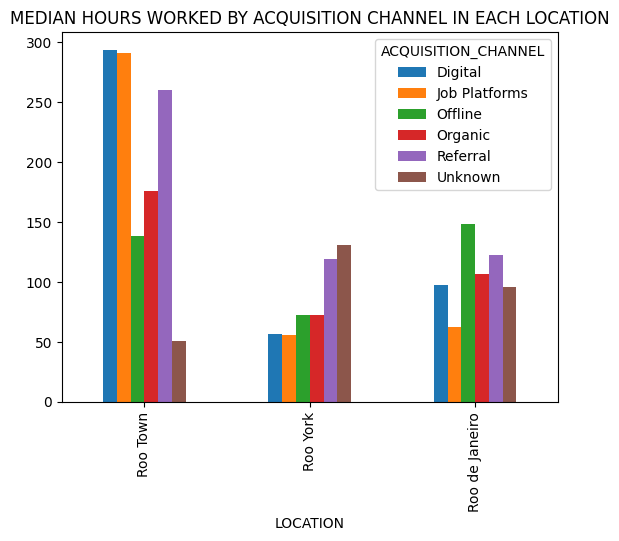

In [30]:
print(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['HOURS_WORKED_CUMULATIVE'].median())
df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['HOURS_WORKED_CUMULATIVE'].median().unstack(level=1).plot.bar(title='MEDIAN HOURS WORKED BY ACQUISITION CHANNEL IN EACH LOCATION')

LOCATION
Roo Town           165600
Roo York          1395510
Roo de Janeiro     720359
Name: ORDERS_DELIVERED_CUMULATIVE, dtype: int64


<Axes: title={'center': 'ORDERS DELIVERED BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION', ylabel='Percentage'>

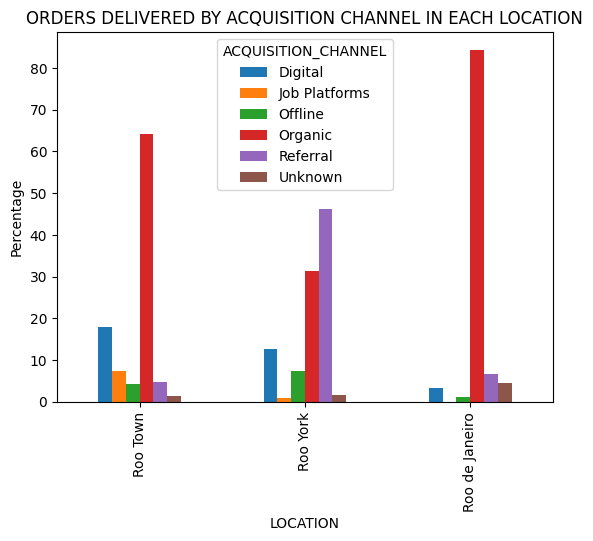

In [168]:
orders_loc = df_riders.groupby('LOCATION')['ORDERS_DELIVERED_CUMULATIVE'].sum()
print(orders_loc)

(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['ORDERS_DELIVERED_CUMULATIVE'].sum().unstack(level=1)\
.div(orders_loc,0)*100).plot.bar(title='ORDERS DELIVERED BY ACQUISITION CHANNEL IN EACH LOCATION', ylabel="Percentage")#plot(kind='bar', stacked=True)

LOCATION        ACQUISITION_CHANNEL
Roo Town        Digital                608.0
                Job Platforms          559.0
                Offline                307.5
                Organic                323.0
                Referral               503.0
                Unknown                 75.0
Roo York        Digital                 94.0
                Job Platforms           90.0
                Offline                127.0
                Organic                124.0
                Referral               212.0
                Unknown                204.5
Roo de Janeiro  Digital                234.0
                Job Platforms          177.0
                Offline                332.0
                Organic                240.0
                Referral               304.0
                Unknown                206.0
Name: ORDERS_DELIVERED_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN ORDERS DELIVERED BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION'>

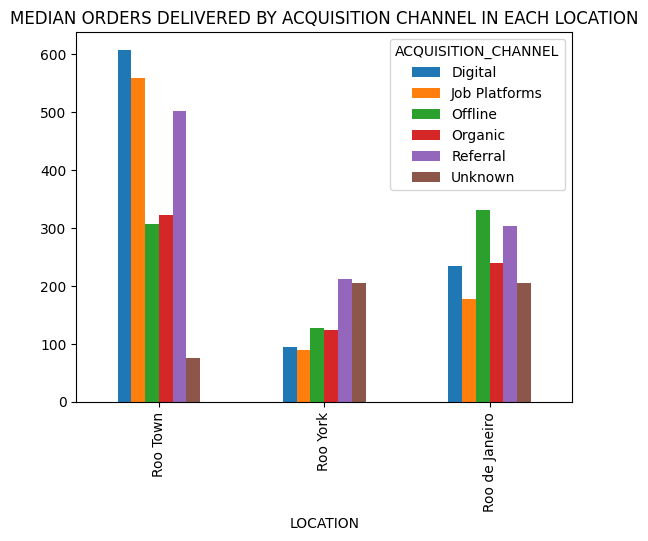

In [31]:
print(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['ORDERS_DELIVERED_CUMULATIVE'].median())
df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['ORDERS_DELIVERED_CUMULATIVE'].median().unstack(level=1).plot.bar(title='MEDIAN ORDERS DELIVERED BY ACQUISITION CHANNEL IN EACH LOCATION')

LOCATION        ACQUISITION_CHANNEL
Roo Town        Digital                1.93
                Job Platforms          1.90
                Offline                2.21
                Organic                2.08
                Referral               1.99
                Unknown                1.62
Roo York        Digital                1.81
                Job Platforms          1.93
                Offline                1.87
                Organic                1.95
                Referral               1.99
                Unknown                1.93
Roo de Janeiro  Digital                2.24
                Job Platforms          2.25
                Offline                2.06
                Organic                2.23
                Referral               2.32
                Unknown                2.20
Name: THROUGHPUT_CUMULATIVE, dtype: float64
LOCATION
Roo Town          2.025
Roo York          1.920
Roo de Janeiro    2.230
Name: THROUGHPUT_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN THROUGHPUT BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION'>

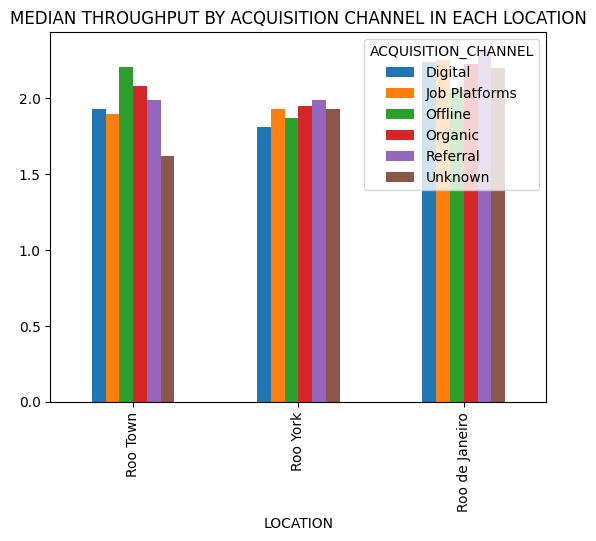

In [44]:
print(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['THROUGHPUT_CUMULATIVE'].median())
# print(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['THROUGHPUT_CUMULATIVE'].median().div(df_riders.groupby(['LOCATION'])['THROUGHPUT_CUMULATIVE'].median()))
df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['THROUGHPUT_CUMULATIVE'].median().unstack(level=1).plot.bar(title='MEDIAN THROUGHPUT BY ACQUISITION CHANNEL IN EACH LOCATION')

LOCATION
Roo Town          2.025
Roo York          1.920
Roo de Janeiro    2.230
Name: THROUGHPUT_CUMULATIVE, dtype: float64


<Axes: title={'center': 'MEDIAN THROUGHPUT BY LOCATION'}, ylabel='LOCATION'>

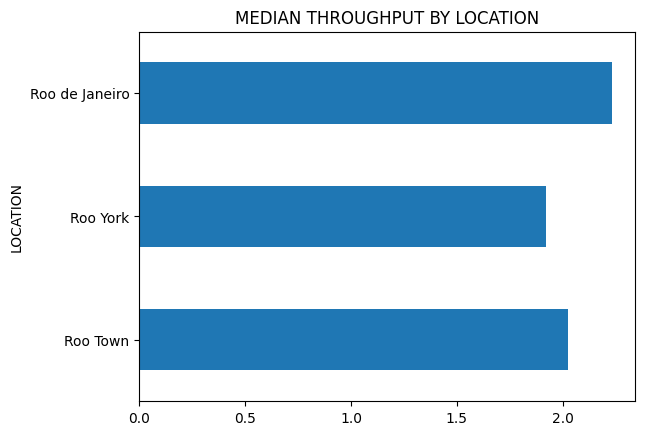

In [47]:
print(df_riders.groupby(['LOCATION'])['THROUGHPUT_CUMULATIVE'].median())
df_riders.groupby(['LOCATION'])['THROUGHPUT_CUMULATIVE'].median().plot.barh(title='MEDIAN THROUGHPUT BY LOCATION',)

### Referrals by channel

<Axes: title={'center': 'REFERRALS BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='Percentage of REFERRALS'>

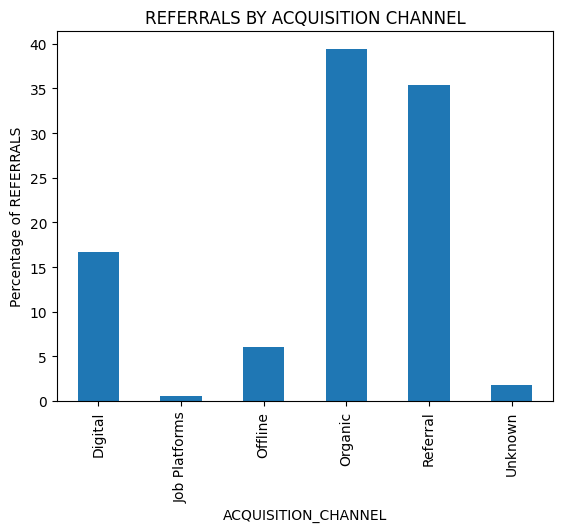

In [181]:
(df_riders.groupby('ACQUISITION_CHANNEL')['REFERRALS_CUMULATIVE'].sum().div(df_riders['REFERRALS_CUMULATIVE'].sum())*100)\
    .plot.bar(title='REFERRALS BY ACQUISITION CHANNEL', ylabel='Percentage of REFERRALS')


In [58]:
# df_riders.groupby('ACQUISITION_CHANNEL')['REFERRALS_CUMULATIVE'].mean()
df_riders.groupby('LOCATION')['REFERRALS_CUMULATIVE'].sum()

LOCATION
Roo Town            79.0
Roo York          2576.0
Roo de Janeiro     706.0
Name: REFERRALS_CUMULATIVE, dtype: float64

<Axes: title={'center': 'SUCCESSFUL_REFERRALS BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='Percentage of SUCCESSFUL_REFERRALS'>

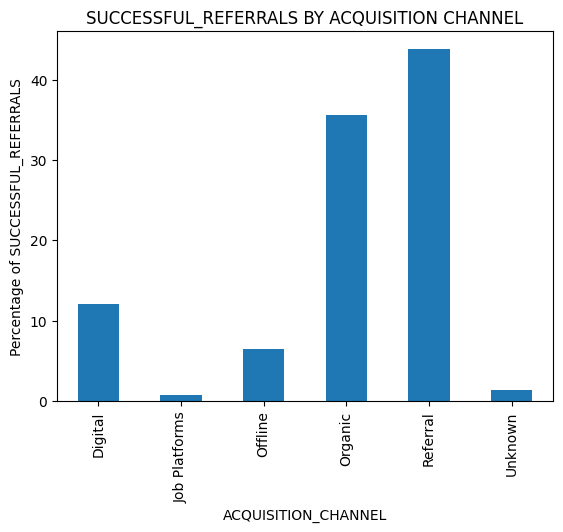

In [183]:
(df_riders.groupby('ACQUISITION_CHANNEL')['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum().div(df_riders['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum())*100)\
    .plot.bar(title='SUCCESSFUL_REFERRALS BY ACQUISITION CHANNEL', ylabel='Percentage of SUCCESSFUL_REFERRALS')


Referrals by Location 

LOCATION
Roo Town            79.0
Roo York          2576.0
Roo de Janeiro     706.0
Name: REFERRALS_CUMULATIVE, dtype: float64


<Axes: title={'center': 'REFERRALS  BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION', ylabel='Percentage'>

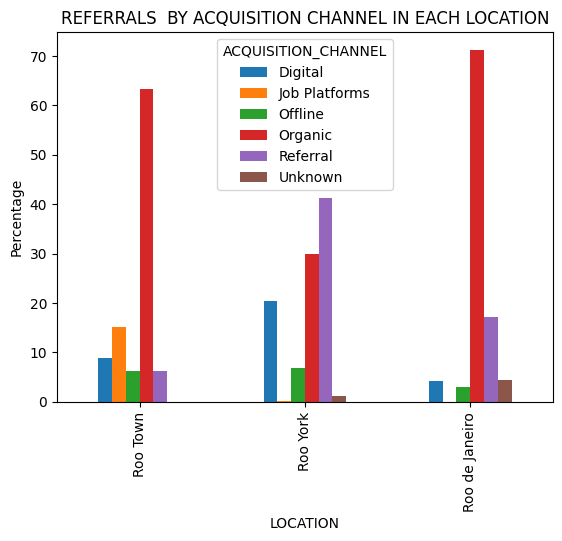

In [196]:
ref_loc = df_riders.groupby('LOCATION')['REFERRALS_CUMULATIVE'].sum()#.div(df_riders['REFERRALS_CUMULATIVE'].sum())*100
print(ref_loc)

(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['REFERRALS_CUMULATIVE'].sum().unstack(level=1)\
    .div(ref_loc,0)*100).plot.bar(title='REFERRALS  BY ACQUISITION CHANNEL IN EACH LOCATION', ylabel="Percentage")#plot(kind='bar', stacked=True)

LOCATION
Roo Town           27.0
Roo York          624.0
Roo de Janeiro     75.0
Name: SUCCESSFUL_REFERRALS_CUMULATIVE, dtype: float64


<Axes: title={'center': 'SUCCESSFUL_REFERRALS  BY ACQUISITION CHANNEL IN EACH LOCATION'}, xlabel='LOCATION', ylabel='Percentage'>

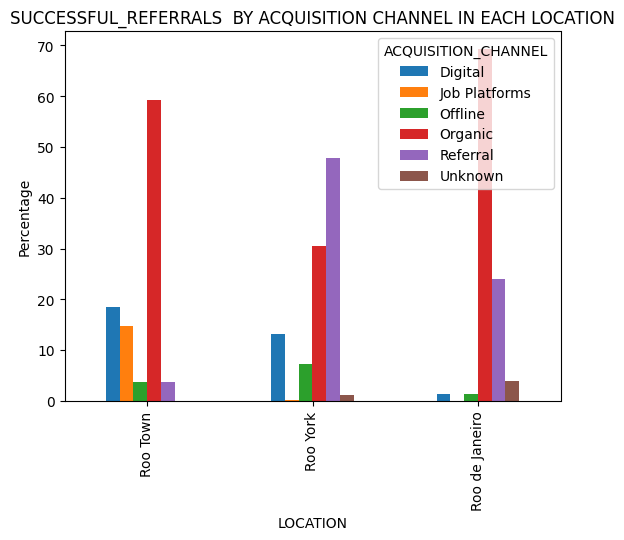

In [197]:
ref_loc = df_riders.groupby('LOCATION')['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum()#.div(df_riders['REFERRALS_CUMULATIVE'].sum())*100
print(ref_loc)

(df_riders.groupby(['LOCATION','ACQUISITION_CHANNEL'])['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum().unstack(level=1)\
    .div(ref_loc,0)*100).plot.bar(title='SUCCESSFUL_REFERRALS  BY ACQUISITION CHANNEL IN EACH LOCATION', ylabel="Percentage")

<Axes: title={'center': 'REFERRAL EFFICIENCY BY ACQUISITION CHANNEL'}, xlabel='ACQUISITION_CHANNEL', ylabel='Percentage of REFERRALS'>

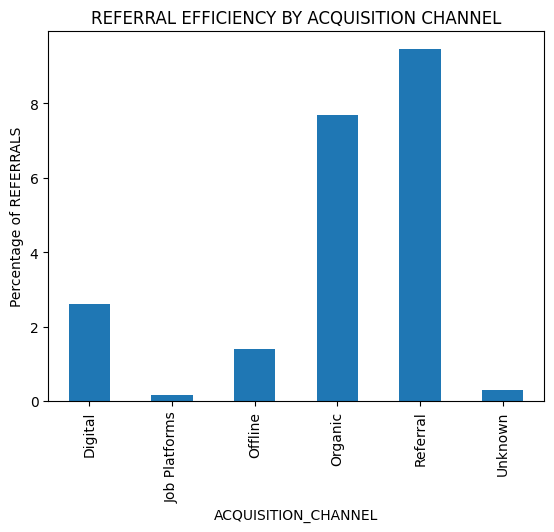

In [198]:
# referral efficiency
(df_riders.groupby('ACQUISITION_CHANNEL')['SUCCESSFUL_REFERRALS_CUMULATIVE'].sum().div(df_riders['REFERRALS_CUMULATIVE'].sum())*100)\
    .plot.bar(title='REFERRAL EFFICIENCY BY ACQUISITION CHANNEL', ylabel='Percentage of REFERRALS')

## Monthly trend analysis

- number of riders joining every month / acquisition channel
- number of referrals ever month / acquisition channel
- number of successful referrals every month / acquisition channel


In [248]:

df_monthly = dataset[['RIDER_ID','FIRST_WORK_MONTH','ACQUISITION_CHANNEL','LOCATION','FIRST_WORK_DATE']]#,'HOURS_WORKED_CUMULATIVE','ORDERS_DELIVERED_CUMULATIVE','THROUGHPUT_CUMULATIVE','REFERRALS_CUMULATIVE','SUCCESSFUL_REFERRALS_CUMULATIVE']]

# find the number of hours worked by each rider in each month
df_monthly.loc[:,'HOURS_WORKED'] = dataset.groupby('RIDER_ID')['HOURS_WORKED_CUMULATIVE'].diff()
# find the number of orders delivered by each rider in each month
df_monthly.loc[:,'ORDERS_DELIVERED'] = dataset.groupby('RIDER_ID')['ORDERS_DELIVERED_CUMULATIVE'].diff()
# find the throughput by each rider in each month
# df_monthly['THROUGHPUT'] = dataset.groupby('RIDER_ID')['THROUGHPUT_CUMULATIVE'].diff()
# find the number of referrals by each rider in each month
df_monthly.loc[:,'REFERRALS'] = dataset.groupby('RIDER_ID')['REFERRALS_CUMULATIVE'].diff()
# find the number of successful referrals by each rider in each month
df_monthly.loc[:,'SUCCESSFUL_REFERRALS'] = dataset.groupby('RIDER_ID')['SUCCESSFUL_REFERRALS_CUMULATIVE'].diff()

# fill missing values with in new columns
# iterate rows in df_monthly
for index, row in df_monthly.iterrows():
    if pd.isnull(row['HOURS_WORKED']):
        df_monthly.loc[index, 'HOURS_WORKED'] = dataset.loc[index, 'HOURS_WORKED_CUMULATIVE']
    if pd.isnull(row['ORDERS_DELIVERED']):
        df_monthly.loc[index, 'ORDERS_DELIVERED'] = dataset.loc[index, 'ORDERS_DELIVERED_CUMULATIVE']
    if pd.isnull(row['REFERRALS']):
        df_monthly.loc[index, 'REFERRALS'] = dataset.loc[index, 'REFERRALS_CUMULATIVE']
    if pd.isnull(row['SUCCESSFUL_REFERRALS']):
        df_monthly.loc[index, 'SUCCESSFUL_REFERRALS'] = dataset.loc[index, 'SUCCESSFUL_REFERRALS_CUMULATIVE']
    # if pd.isnull(row['THROUGHPUT']):
    #     df_monthly.at[index, 'THROUGHPUT'] = dataset.loc[index, 'THROUGHPUT_CUMULATIVE']


# df_monthly.head(10)
# df_monthly.isna().sum()

/tmp/ipykernel_149749/4025998464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly.loc[:,'HOURS_WORKED'] = dataset.groupby('RIDER_ID')['HOURS_WORKED_CUMULATIVE'].diff()
/tmp/ipykernel_149749/4025998464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly.loc[:,'ORDERS_DELIVERED'] = dataset.groupby('RIDER_ID')['ORDERS_DELIVERED_CUMULATIVE'].diff()
/tmp/ipykernel_149749/4025998464.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Axes: title={'center': 'MONTHLY RIDERS INTAKE BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of RIDERS'>

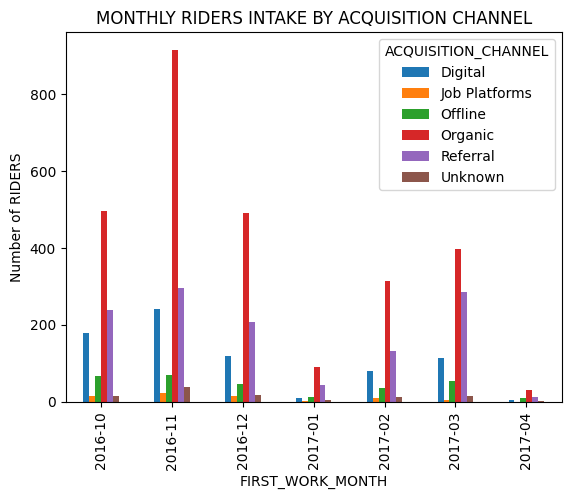

In [220]:
# df_monthly.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL']).size().unstack(level=1).plot(kind='bar', stacked=True, title='MONTHLY RIDER ACQUISITION BY ACQUISITION CHANNEL')

# number of riders joining each month per acquisition channel
(df_monthly.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['RIDER_ID'].nunique().unstack(level=1))\
    .plot.bar(title='MONTHLY RIDERS INTAKE BY ACQUISITION CHANNEL', ylabel='Number of RIDERS')


<Axes: title={'center': 'MONTHLY REFERRALS BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

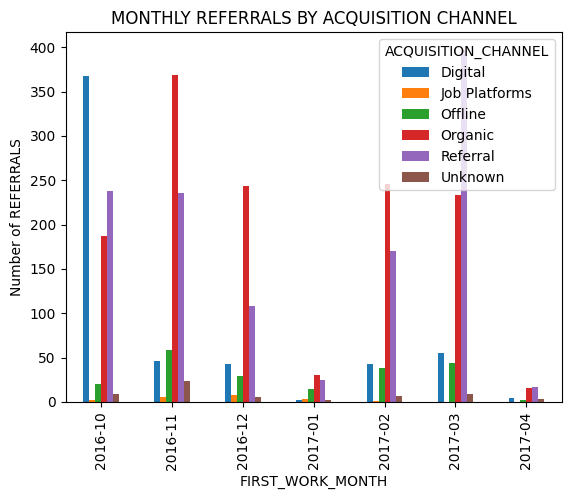

In [243]:
# monthly referrals per acquisition channel
(df_monthly.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['REFERRALS'].sum().unstack(level=1))\
    .plot.bar(title='MONTHLY REFERRALS BY ACQUISITION CHANNEL', ylabel='Number of REFERRALS')

<Axes: title={'center': 'MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of SUCCESSFUL REFERRALS'>

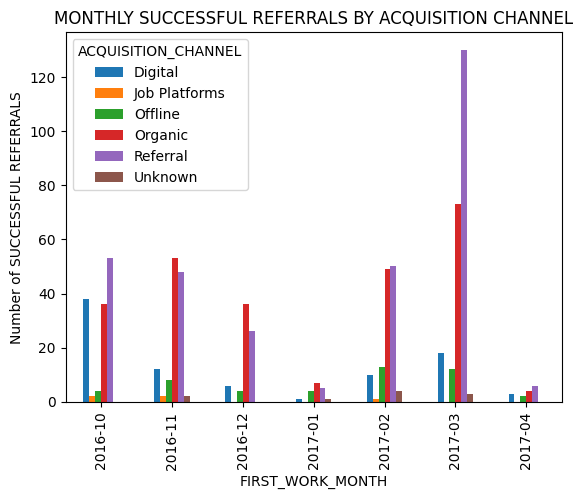

In [245]:
# monthly successful referrals per acquisition channel
(df_monthly.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['SUCCESSFUL_REFERRALS'].sum().unstack(level=1))\
    .plot.bar(title='MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL', ylabel='Number of SUCCESSFUL REFERRALS')

In [252]:
# monthly orders delivered
(df_monthly.groupby(['FIRST_WORK_MONTH'])['ORDERS_DELIVERED'].sum())
    #.plot.bar(title='MONTHLY ORDERS DELIVERED BY ACQUISITION CHANNEL', ylabel='Number of ORDERS DELIVERED')

FIRST_WORK_MONTH
2016-10    354913.0
2016-11    641021.0
2016-12    390923.0
2017-01     84728.0
2017-02    324101.0
2017-03    446180.0
2017-04     39603.0
Name: ORDERS_DELIVERED, dtype: float64

<Axes: title={'center': 'MONTHLY RIDERS INTAKE BY LOCATION'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of RIDERS'>

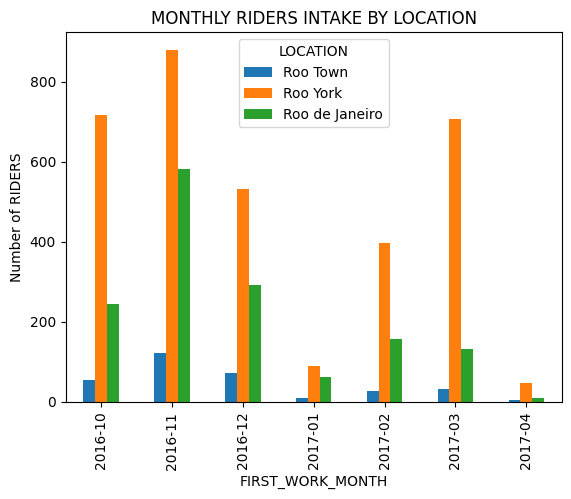

In [257]:
# monthly riders joining by location
(df_monthly.groupby(['FIRST_WORK_MONTH','LOCATION'])['RIDER_ID'].nunique().unstack(level=1))\
    .plot.bar(title='MONTHLY RIDERS INTAKE BY LOCATION', ylabel='Number of RIDERS')

<Axes: title={'center': 'MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO YORK'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

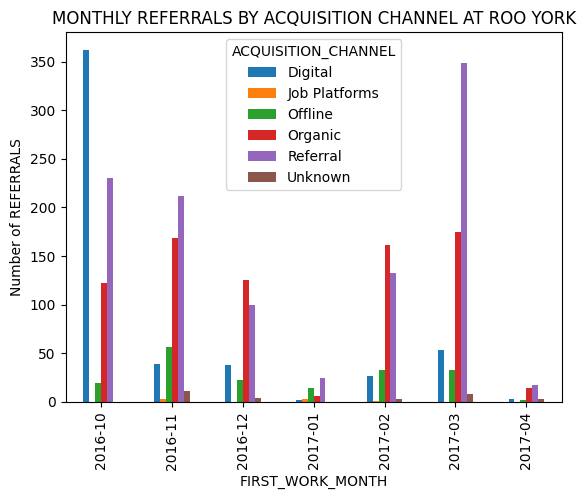

In [260]:
# monthly referrals per acquisition channel at Roo York
df_monthly[df_monthly['LOCATION']=='Roo York'].groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO YORK', ylabel='Number of REFERRALS')


<Axes: title={'center': 'MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL AT ROO YORK'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of SUCCESSFUL REFERRALS'>

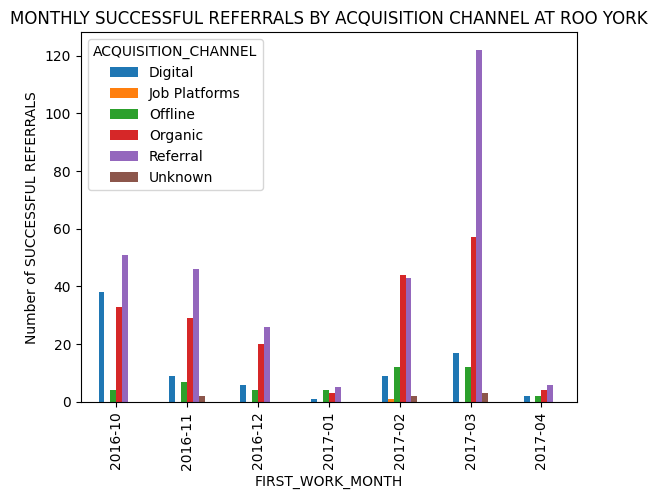

In [261]:
# monthly successful referrals per acquisition channel at Roo York
df_monthly[df_monthly['LOCATION']=='Roo York'].groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['SUCCESSFUL_REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL AT ROO YORK', ylabel='Number of SUCCESSFUL REFERRALS')

<Axes: title={'center': 'MONTHLY ORDERS DELIVERED AT ROO YORK'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of ORDERS DELIVERED'>

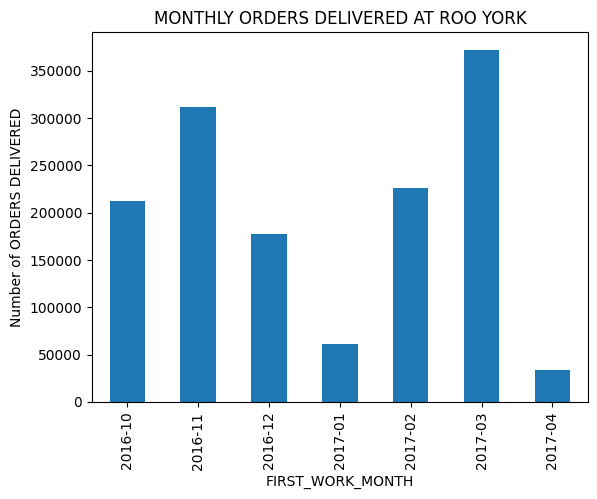

In [262]:
# monthly orders delivered at Roo York
df_monthly[df_monthly['LOCATION']=='Roo York'].groupby(['FIRST_WORK_MONTH'])['ORDERS_DELIVERED'].sum()\
    .plot.bar(title='MONTHLY ORDERS DELIVERED AT ROO YORK', ylabel='Number of ORDERS DELIVERED')

<Axes: title={'center': 'MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO TOWN'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

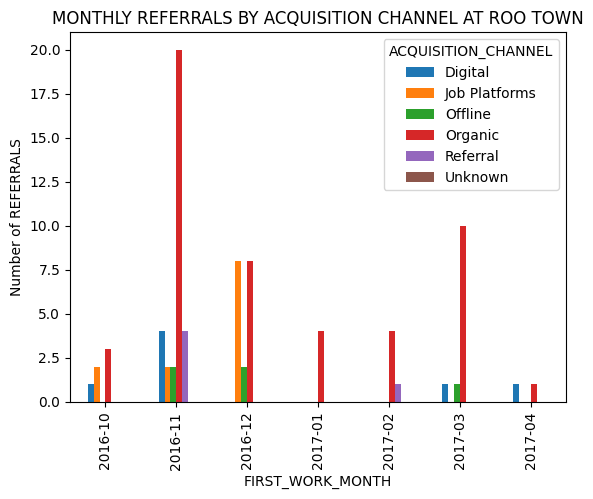

In [263]:
# monthly referrals per acquisition channel at Roo Town
df_monthly[df_monthly['LOCATION']=='Roo Town'].groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO TOWN', ylabel='Number of REFERRALS')

<Axes: title={'center': 'MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL AT ROO TOWN'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of SUCCESSFUL REFERRALS'>

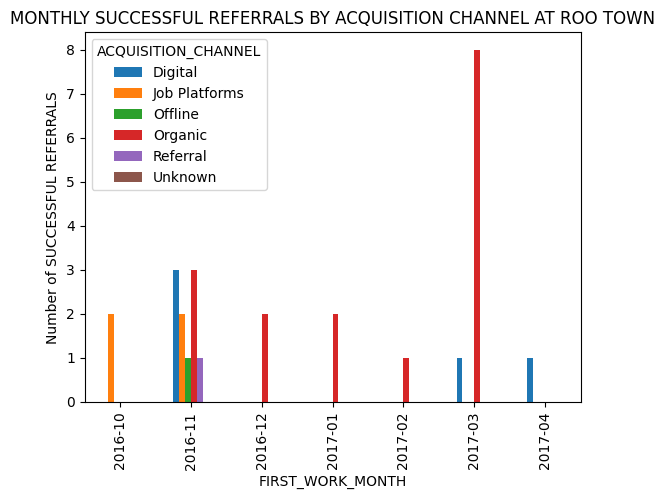

In [264]:
# monthly successful referrals per acquisition channel at Roo Town
df_monthly[df_monthly['LOCATION']=='Roo Town'].groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['SUCCESSFUL_REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY SUCCESSFUL REFERRALS BY ACQUISITION CHANNEL AT ROO TOWN', ylabel='Number of SUCCESSFUL REFERRALS')

<Axes: title={'center': 'MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO DE JANEIRO'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

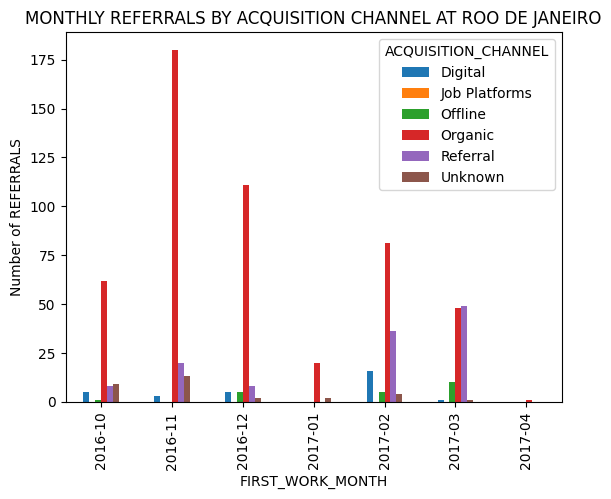

In [265]:
# monthly referrals per acquisition channel at Roo de Janeiro
df_monthly[df_monthly['LOCATION']=='Roo de Janeiro'].groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY REFERRALS BY ACQUISITION CHANNEL AT ROO DE JANEIRO', ylabel='Number of REFERRALS')

<Axes: title={'center': 'MONTHLY REFERRALS BY LOCATION'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

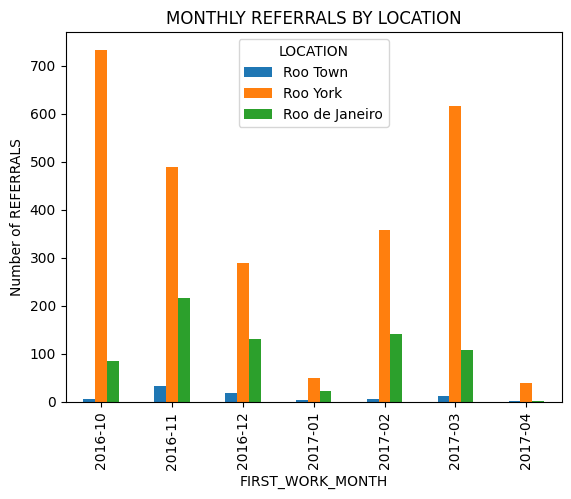

In [266]:
# monthly referrals by location
df_monthly.groupby(['FIRST_WORK_MONTH','LOCATION'])['REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY REFERRALS BY LOCATION', ylabel='Number of REFERRALS')

<Axes: title={'center': 'MONTHLY SUCCESSFUL REFERRALS BY LOCATION'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of SUCCESSFUL REFERRALS'>

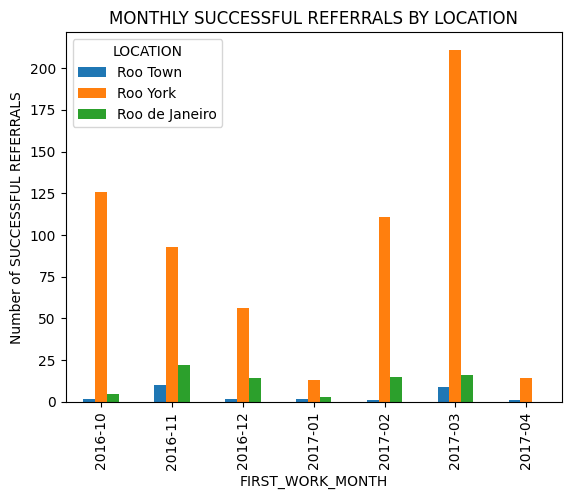

In [267]:
# monthly successful referrals by location
df_monthly.groupby(['FIRST_WORK_MONTH','LOCATION'])['SUCCESSFUL_REFERRALS'].sum().unstack(level=1)\
    .plot.bar(title='MONTHLY SUCCESSFUL REFERRALS BY LOCATION', ylabel='Number of SUCCESSFUL REFERRALS')

<Axes: title={'center': 'MONTHLY ORDERS DELIVERED BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of ORDERS DELIVERED'>

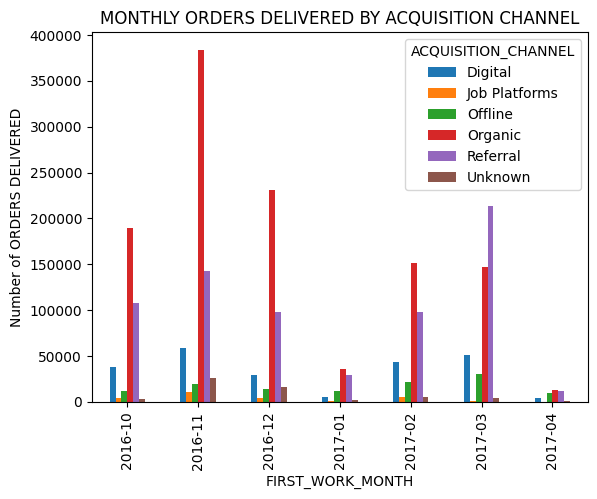

In [247]:
# monthly orders delivered per acquisition channel
(df_monthly.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['ORDERS_DELIVERED'].sum().unstack(level=1))\
    .plot.bar(title='MONTHLY ORDERS DELIVERED BY ACQUISITION CHANNEL', ylabel='Number of ORDERS DELIVERED')

<Axes: title={'center': 'MONTHLY DISTRIBUTION OF RIDERS'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of RIDERS'>

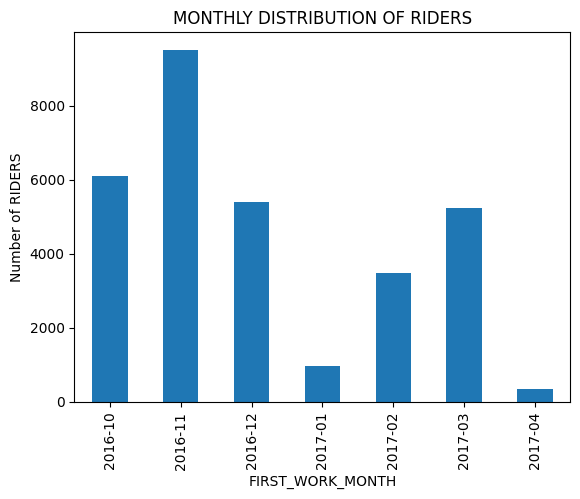

In [256]:
# distribution of data over months
df_monthly.groupby('FIRST_WORK_MONTH').size().plot.bar(title='MONTHLY DISTRIBUTION OF RIDERS', ylabel='Number of RIDERS')

<Axes: title={'center': 'MONTHLY RIDERS INTAKE BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of RIDERS'>

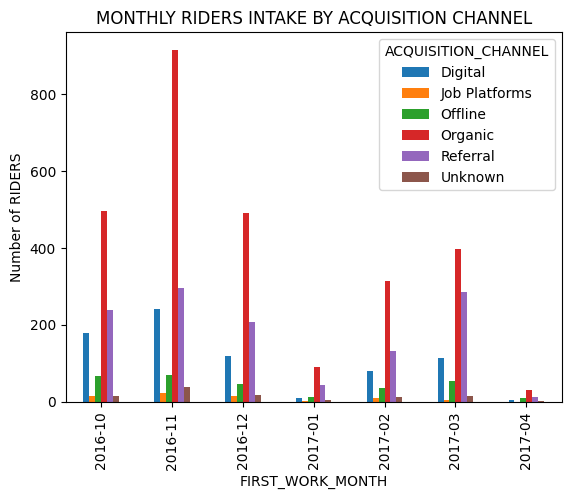

In [209]:
df_riders['FIRST_WORK_MONTH'] = pd.to_datetime(df_riders['FIRST_WORK_DATE']).dt.strftime('%Y-%m')


# monthly riders intake by acquisition channel
(df_riders.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['RIDER_ID'].count().unstack(level=1))\
    .plot.bar(title='MONTHLY RIDERS INTAKE BY ACQUISITION CHANNEL', ylabel='Number of RIDERS')


<Axes: title={'center': 'MONTHLY REFERRALS BY ACQUISITION CHANNEL'}, xlabel='FIRST_WORK_MONTH', ylabel='Number of REFERRALS'>

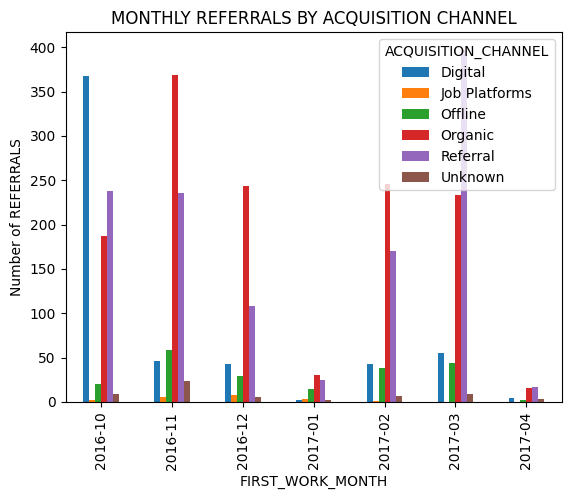

In [210]:
# monthly referrals by acquisition channel
(df_riders.groupby(['FIRST_WORK_MONTH','ACQUISITION_CHANNEL'])['REFERRALS_CUMULATIVE'].sum().unstack(level=1))\
    .plot.bar(title='MONTHLY REFERRALS BY ACQUISITION CHANNEL', ylabel='Number of REFERRALS')

## Answer:
The data reveals that `Organic` channel is the most effective comprising of over 53% of riders. `Referral` is the second most source of acquisition comprising of 23% of riders.

## Question 2
Is RGR a successful scheme? Should it be changed?

In [ ]:
# check for missing values in the referrals columns
f"Missing rows in referrals and successful referrals column {df.REFERRALS_CUMULATIVE.isna().sum(), df.SUCCESSFUL_REFERRALS_CUMULATIVE.isna().sum()}"

'Missing rows in referrals and successful referrals column (26982, 26982)'

In [ ]:
# percentage of successful referrals
f"Percentage of successful referrals {round((df.SUCCESSFUL_REFERRALS_CUMULATIVE / df.REFERRALS_CUMULATIVE).mean()*100,2)}%"

'Percentage of successful referrals 21.08%'